## Sales Analysis

### Import Necessary Libraries

In [283]:
import pandas as pd
from pathlib import Path

### Merging 12 months of sales data into a single file

In [284]:
path = Path("./Sales_Data")

files_path = [file for file in path.iterdir() if file.is_file()] 

all_months_data = pd.concat([pd.read_csv(p) for p in files_path],axis=0)

all_months_data.to_csv("all_data.csv",index=False)

### Read in updated dataframe

In [285]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data

##### Drop rows of NAN

In [286]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')


##### Find 'Or' and delete it

In [287]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Convert columns to the correct type

In [288]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

##### Add Month Column

In [289]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add a sales column

In [290]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Add city column

In [291]:
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address): #Because of Porland ME and Portland OR
    return address.split(',')[2].split(' ')[1].strip()

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question 1 :What was the best month for sales? How much earned that month?

In [292]:
results= all_data.groupby('Month')['Sales'].sum()

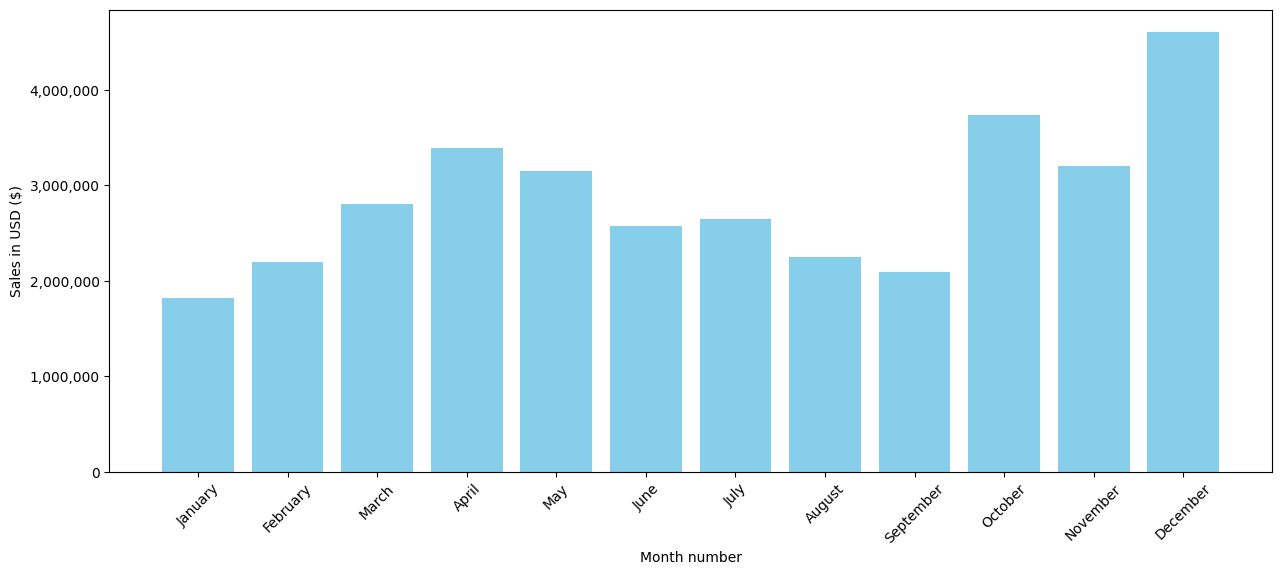

In [293]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(15, 6))

plt.bar(range(12), results,color='skyblue')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')) #Improving legibility of y-axis

plt.xticks(range(12), month_names,rotation=45)

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

plt.show()

### Question 2: What city had the highest number of sales?

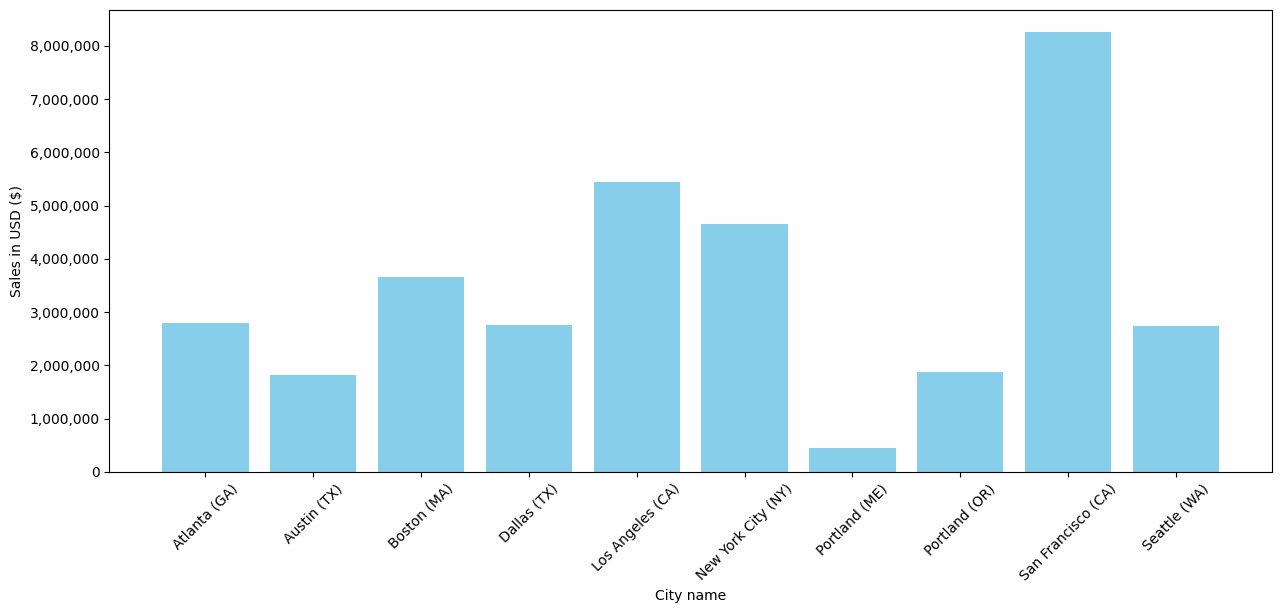

In [294]:
import matplotlib.pyplot as plt

results = all_data.groupby('City')['Sales'].sum()
cities = results.index


plt.figure(figsize=(15, 6))

plt.bar(cities, results.values,color='skyblue')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')) #Improving legibility of y-axis

plt.xticks(cities,rotation=45)

plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')

plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [295]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'],format='%m/%d/%y %H:%M')

In [296]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


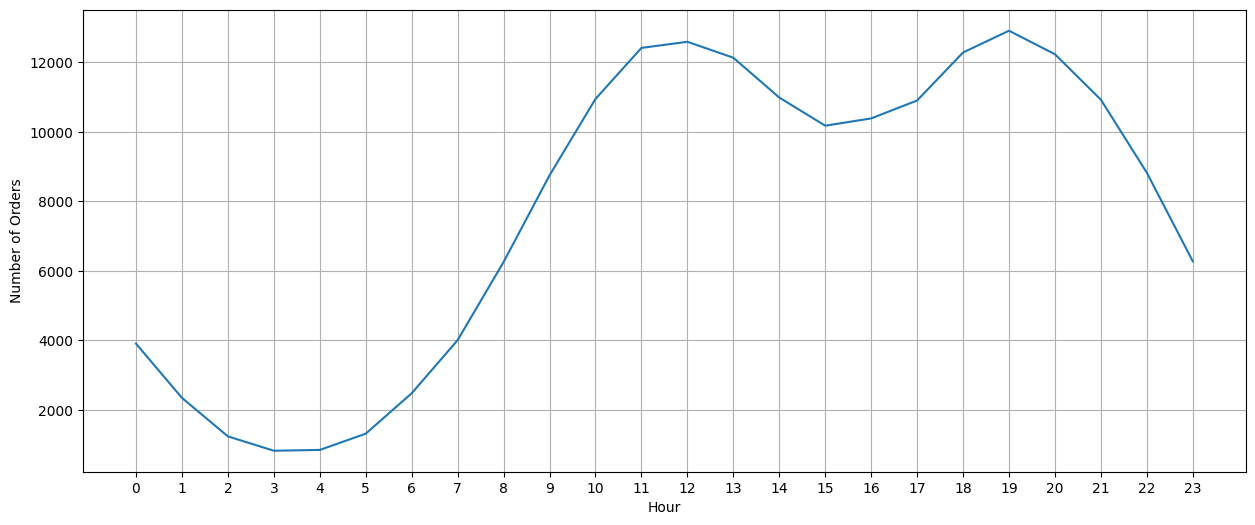

In [297]:
result = all_data.groupby('Hour')['Hour'].count()
hours = result.index

plt.figure(figsize=(15, 6))

plt.plot(hours, result.values)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#My recommendation is around 11am (11) ot 7pm (19)

### Question 4: By knowing that Los Angeles is the city with the most sales, what time should we display an advertisement in that city?

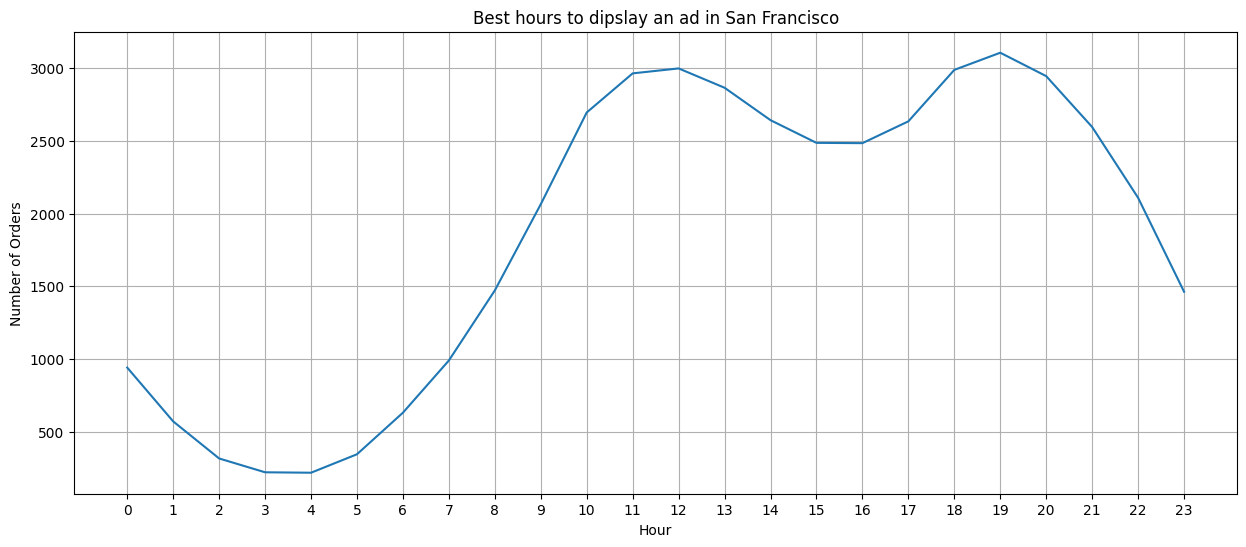

In [298]:
la_data = all_data[all_data['City'] == "San Francisco (CA)"]

result = la_data.groupby('Hour')['Hour'].count()
hours = result.index

plt.figure(figsize=(15, 6))

plt.title("Best hours to dipslay an ad in San Francisco")
plt.plot(hours, result.values)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#The result is almost the same as if we evaluate all the cities together

### Question 5: What pair of products are most often sold together?

In [299]:
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy() #I keep only the duplicates

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) 

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [300]:
#Count combinations

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))


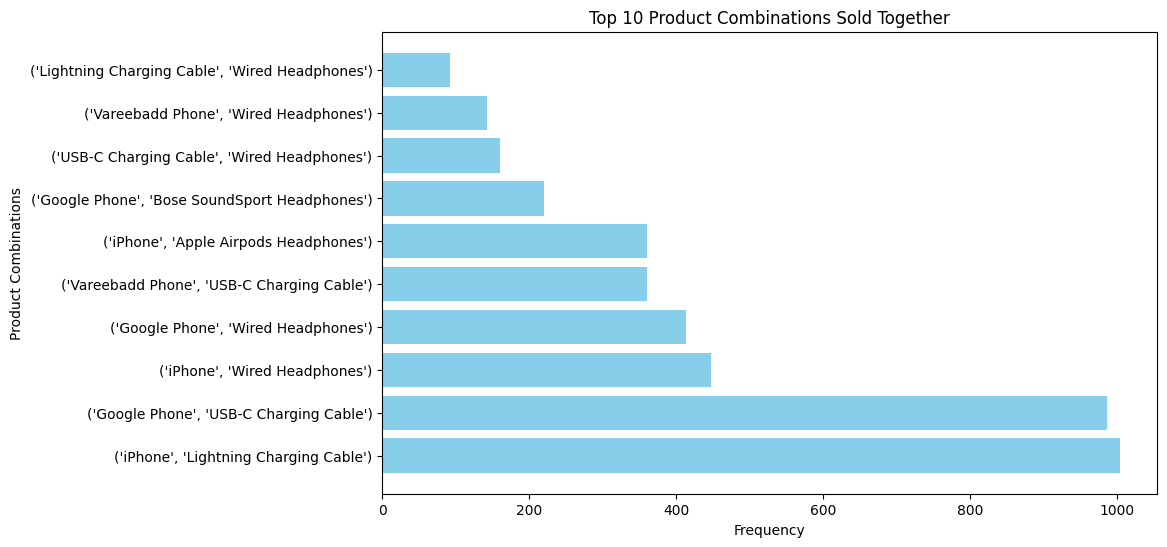

In [301]:
import matplotlib.pyplot as plt

top_combinations = count.most_common(10)

combinations = [str(key) for key, _ in top_combinations]
frequencies = [value for _, value in top_combinations]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(combinations, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Product Combinations')
plt.title('Top 10 Product Combinations Sold Together')
plt.show()

### Question 6: What product sold the most? 

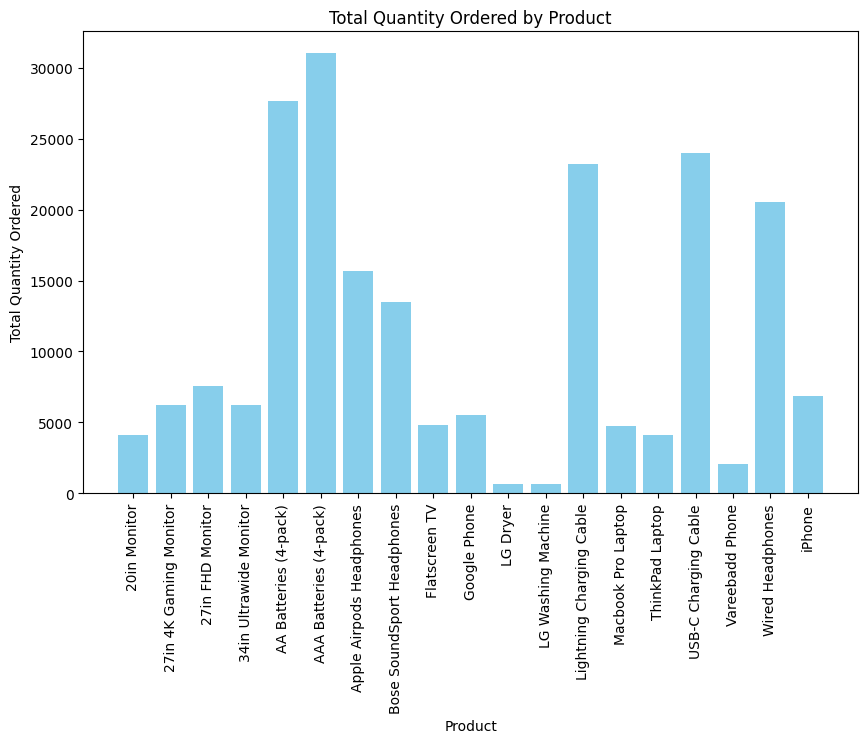

In [302]:
product_group = all_data.groupby('Product')['Quantity Ordered'].sum()
products = product_group.index
quantity_ordered = product_group.values

plt.figure(figsize=(10, 6))
plt.bar(products, quantity_ordered, color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered by Product')
plt.xticks(rotation=90) 
plt.show()

### Question 7: Is there any relationship between price and the quantity of products sold?

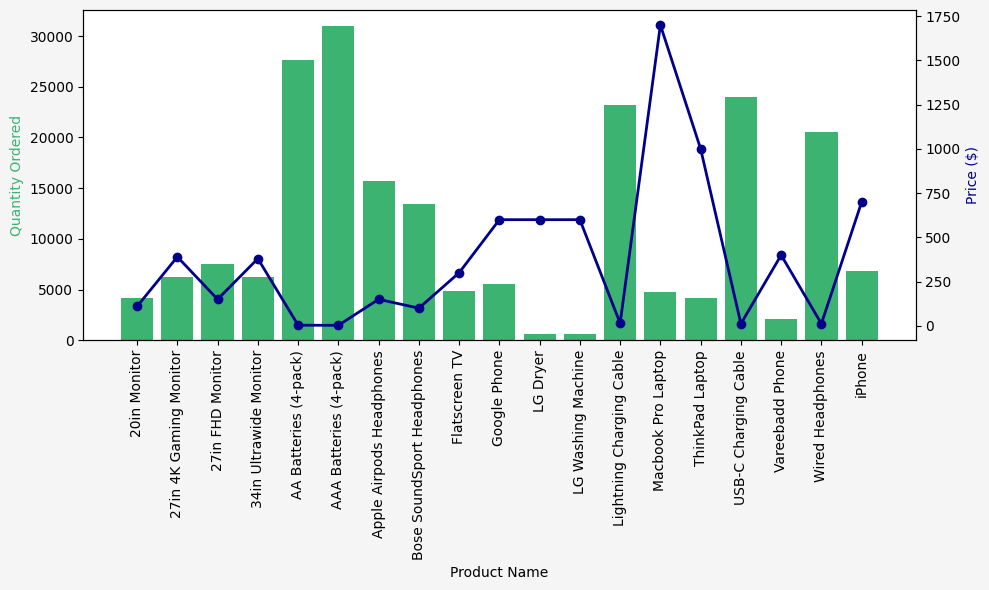

In [303]:
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='mediumseagreen')

ax2.plot(products, prices, marker='o', color='darkblue', linewidth=2)

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='mediumseagreen')
ax2.set_ylabel('Price ($)', color='darkblue')

ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', fontsize=10)

fig.patch.set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()

### Question 8: Which product generated the most revenue?

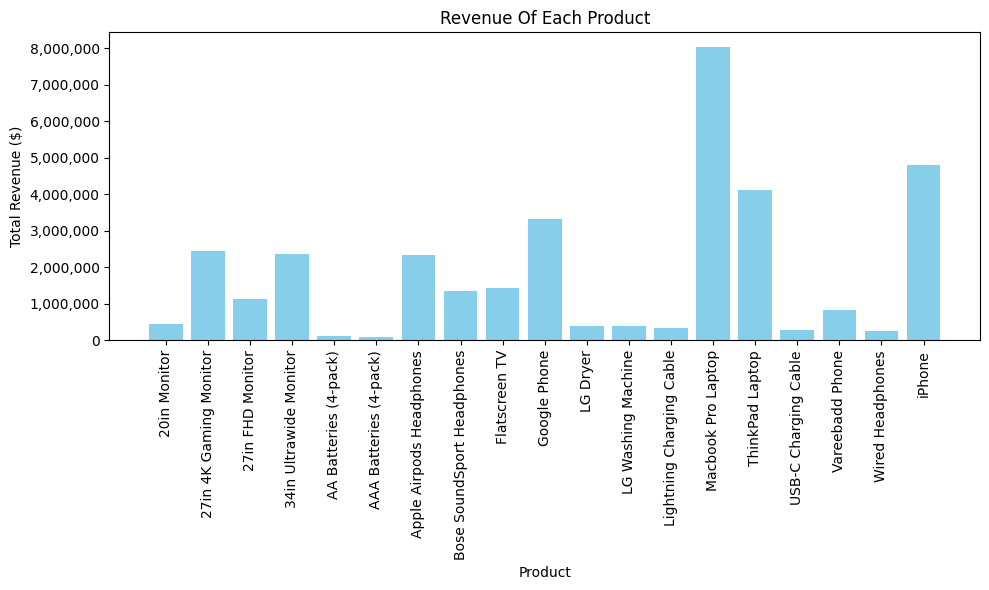

In [304]:
prod_group = all_data.groupby('Product')['Sales'].sum()
products = prod_group.index

plt.figure(figsize=(10, 6))

plt.bar(products, prod_group.values, color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.title('Revenue Of Each Product')
plt.xticks(rotation=90) 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')) #Improving legibility of y-axis
plt.tight_layout()
plt.show()


In [305]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


### Question 9: What is the average quantity of products ordered per order?

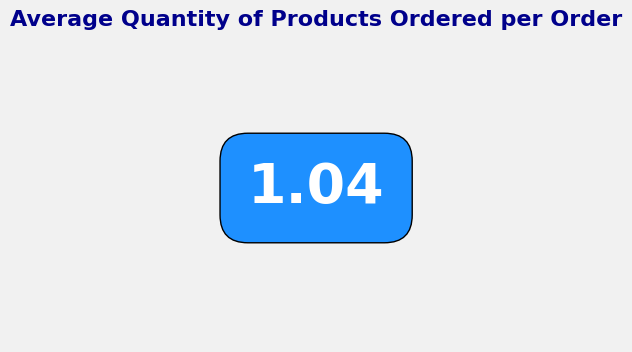

In [306]:
#Grouping all the products by order  
order_count = all_data.groupby('Order ID')['Product'].count()

average_products = order_count.mean()

plt.figure(figsize=(4, 4))

plt.text(0.5, 0.5, f'{average_products:.2f}', fontsize=40, ha='center', va='center', fontweight='bold', color='white')

plt.gcf().patch.set_facecolor('#f1f1f1')  # Color de fondo más suave

# The box for the text
plt.text(0.5, 0.5, f'{average_products:.2f}', fontsize=40, ha='center', va='center', fontweight='bold',
         color='white', bbox=dict(facecolor='dodgerblue', edgecolor='black', boxstyle='round,pad=0.5'))

plt.axis('off')

plt.title('Average Quantity of Products Ordered per Order', fontsize=16, fontweight='bold', color='darkblue')

plt.show()


### Question 10: How much revenue was generated from orders placed during weekends versus weekdays?

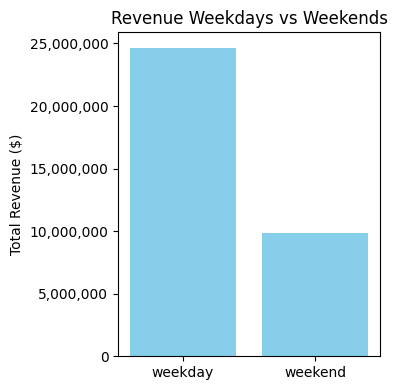

In [307]:
def check_weekend_or_weekday(date):
    return 'weekend' if date.weekday() >= 5 else 'weekday'

all_data['Weekend_or_Weekday'] = all_data['Order Date'].apply(lambda x: check_weekend_or_weekday(x))

revenue_day = all_data.groupby('Weekend_or_Weekday')['Sales'].sum()

plt.figure(figsize=(4, 4))

plt.bar(revenue_day.index, revenue_day.values, color='skyblue')
plt.ylabel('Total Revenue ($)')
plt.title('Revenue Weekdays vs Weekends')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')) #Improving legibility of y-axis
plt.tight_layout()
plt.show()